# Traditional NLP

- Reference: https://huggingface.co/datasets/lang-uk/recruitment-dataset-job-descriptions-english
- Data: Recruitment Dataset (English Job Descriptions part) contains 150,000 job descriptions posted between 2020-2023 on the Djinni IT job platform. The dataset includes samples in English and Ukrainian. The dataset contains various attributes related to job descriptions, including position titles, job descriptions, company names, experience requirements, keywords, English proficiency levels, publication dates, language of job descriptions, and unique identifiers.

In [6]:
from datasets import load_dataset

data = load_dataset("lang-uk/recruitment-dataset-job-descriptions-english")['train']
df = data.to_pandas()


/Users/adfz088/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
len(df)

141897

In [7]:
df.head()

,Position,Long Description,Company Name,Exp Years,Primary Keyword,English Level,Published,Long Description_lang,id,__index_level_0__
0,10 + Blockchain Nodes / Masternodes to set up,*Requirements*\r\n\r\nWe're looking for a long...,MyCointainer,2y,Sysadmin,intermediate,2020-10-01T00:00:00+03:00,en,c0ca96e7-85df-50df-a64e-d934cd02a170,27461
1,10 .NET Developers (Middle and Senior level),"Greetings! My name is Maria, I am in urgent ne...",TechScout.tech,2y,.NET,intermediate,2022-03-01T00:00:00+02:00,en,64f4b7ea-36e4-5bdd-a8b1-185f32f7dc7f,27462
2,"10X Engineer (co-founder, #4 employee, USD 11-...",**Product**\r\nThe product is a live video cha...,Innoteka,5y,JavaScript,fluent,2021-07-01T00:00:00+03:00,en,b9a1303e-dd0c-5ed1-8f62-be2bc4c7da4f,27463
3,16 - Amazon Brand Manager,"Currently, TCM expanding its activities to Ukr...",FirstFive,2y,Marketing,upper,2022-01-01T00:00:00+02:00,en,99cb3f4a-9b4b-53d9-9a3b-bab2c22da346,27464
4,16 - Amazon Brand Manager,"Hello,\r\nWe, MIMIRB2B, are an outstaff compan...",MimirB2B,1y,Marketing,upper,2021-12-01T00:00:00+02:00,en,bc1419f7-28e2-582b-8d53-22e28b2f0210,27465


## Preprocessing
Lowercasing and removing punctuation to prepare text for vectorization.

In [8]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import re
import nltk
nltk.download('punkt')

def preprocess(text):
    text = text.lower()
    # Regex: It keeps only the allowed characters (lowercase letters, digits, and whitespace), 
    # removing everything else—special characters, punctuation, uppercase letters, etc.
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = text.replace('\n', ' ').replace('\r', ' ') # \n: move cursor to the next line
    return text 

df['clean_doc'] = df['Long Description'].apply(preprocess)
df['clean_doc'].head()

[nltk_data] Downloading package punkt to /Users/adfz088/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    requirements    were looking for a long term c...
1    greetings my name is maria i am in urgent need...
2    product  the product is a live video chat and ...
3    currently tcm expanding its activities to ukra...
4    hello  we mimirb2b are an outstaff company and...
Name: clean_doc, dtype: object

## Bag-of-Words
Using `CountVectorizer` to get raw token counts.

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# choose top 5,000 words
vectorizer_limited = CountVectorizer(max_features=5000, min_df=5)
X = vectorizer_limited.fit_transform(df['clean_doc'])
print("Limited vocabulary size:", len(vectorizer_limited.vocabulary_))
X_df = pd.DataFrame(X.toarray(), columns=vectorizer_limited.get_feature_names_out())
X_df.iloc[0].sort_values(ascending=False).head()

# https://regex101.com/

Limited vocabulary size: 5000


to               2
long             2
term             2
collaboration    2
an               2
Name: 0, dtype: int64

In [18]:
# Tokens to vectors  -> what would be disadvantages using BoW? 
vectorizer_limited.vocabulary_

{'requirements': 3751,
 'were': 4880,
 'looking': 2594,
 'for': 1771,
 'a': 0,
 'long': 2588,
 'term': 4451,
 'collaboration': 786,
 'with': 4920,
 'someone': 4140,
 'that': 4474,
 'has': 2005,
 'an': 204,
 'experience': 1613,
 'in': 2174,
 'crypto': 1069,
 'etc': 1547,
 'we': 4839,
 'need': 2905,
 'to': 4542,
 'set': 4019,
 'up': 4688,
 'network': 2918,
 'candidates': 611,
 'will': 4908,
 'have': 2007,
 'opportunity': 3061,
 'get': 1901,
 'more': 2843,
 'jobs': 2389,
 'and': 217,
 'my': 2886,
 'name': 2888,
 'is': 2357,
 'i': 2119,
 'am': 189,
 'find': 1719,
 'team': 4418,
 'of': 2998,
 'net': 2915,
 'developers': 1238,
 'middle': 2769,
 'senior': 3993,
 'level': 2518,
 'join': 2390,
 'the': 4476,
 'product': 3446,
 'company': 832,
 'customer': 1088,
 'from': 1824,
 'sweden': 4362,
 'years': 4977,
 'project': 3476,
 'monolith': 2837,
 'some': 4139,
 'microservices': 2766,
 'platform': 3290,
 'lets': 2515,
 'sellers': 3984,
 'vendors': 4760,
 'build': 570,
 'sell': 3983,
 'deliver': 11

In [20]:
X_df

,a,aaa,ab,abap,abilities,ability,able,about,above,abreast,...,youve,yrs,zabbix,zendesk,zeplin,zero,zinnov,zone,zones,zoom
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,0,0,0,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0
3,8,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141892,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141893,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141894,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141895,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF
Using `TfidfVectorizer` to weigh terms by inverse document frequency.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000,min_df=5)
X_tfidf = tfidf.fit_transform(df['clean_doc'])
print('Number of features:', len(tfidf.vocabulary_))
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_tfidf_df.iloc[0].sort_values(ascending=False).head(10)

Number of features: 5000


term             0.466401
long             0.419645
collaboration    0.322201
jobs             0.263017
crypto           0.245948
someone          0.214213
candidates       0.182585
network          0.171036
set              0.166053
were             0.160704
Name: 0, dtype: float64

In [10]:
X_tfidf_df

,a,aaa,ab,abap,abilities,ability,able,about,above,abreast,...,youve,yrs,zabbix,zendesk,zeplin,zero,zinnov,zone,zones,zoom
0,0.050737,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.036007,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.129998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.02485,0.0,0.0,...,0.0,0.159181,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.078764,0.0,0.0,0.0,0.000000,0.069725,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.049987,0.0,0.0,0.0,0.0
4,0.070662,0.0,0.0,0.0,0.000000,0.071489,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.051252,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141892,0.089085,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
141893,0.000000,0.0,0.0,0.0,0.000000,0.042974,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
141894,0.000000,0.0,0.0,0.0,0.111333,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
141895,0.161084,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Comparison for a Sample Document

In [18]:
doc_idx = 6
print('Bag-of-Words top tokens:')
print(X_df.iloc[doc_idx].sort_values(ascending=False).head())

print('TF-IDF top tokens:')
print(X_tfidf_df.iloc[doc_idx].sort_values(ascending=False).head())

Bag-of-Words top tokens:
and      8
of       4
sales    3
good     2
work     2
Name: 6, dtype: int64
TF-IDF top tokens:
sales          0.308814
and            0.237762
potential      0.217917
objections     0.208420
bookkeeping    0.203562
Name: 6, dtype: float64


## Limitations of BoW and TF-IDF
- High-dimensional and sparse representations
- No semantic understanding or context
- Cannot capture synonyms or polysemy

# Classification using Traditional NLP

In [36]:
df['Position'].value_counts().head(6)

Position
DevOps Engineer          1584
Business Analyst         1108
Project Manager          1066
Java Developer            795
Senior Java Developer     669
IT Recruiter              629
Name: count, dtype: int64

In [26]:
import numpy as np
import pandas as pd

from sklearn.model_selection   import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes      import MultinomialNB
from sklearn.linear_model     import LogisticRegression
from sklearn.ensemble         import RandomForestClassifier
from sklearn.metrics          import accuracy_score, classification_report

# 1) Label Filtering
classes_2 = ['DevOps Engineer', 'Business Analyst']
df2 = df[df['Position'].isin(classes_2)].copy()
X2, y2 = df2['clean_doc'], df2['Position']

classes_5 = ['DevOps Engineer', 'Business Analyst', 'Project Manager', 'Java Developer', 'IT Recruiter']
df5 = df[df['Position'].isin(classes_5)].copy()
X5, y5 = df5['clean_doc'], df5['Position']

# 2) Evaluation 
def evaluate_classifiers(X, y, vectorizer, vect_name):
    X_vect = vectorizer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_vect, y, test_size=0.3, random_state=42, stratify=y)

    models = [
        ('Naive Bayes', MultinomialNB()),
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
    ]

    results = []
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        results.append({
            'Scenario': vect_name,
            'Classifier': name,
            'Accuracy': round(acc, 3),
            #  precision/recall/f1-score
            **{f"{cls}_{metric}": round(report[cls][metric], 3)
               for cls in model.classes_
               for metric in ['precision', 'recall', 'f1-score']}
        })
    return results

# 3) BoW vs TF-IDF comparison
vectorizers = [
    (CountVectorizer(max_features=5000, min_df=5), 'BoW'),
    (TfidfVectorizer(max_features=5000, min_df=5), 'TF-IDF')
]

all_results = []
for vect, name in vectorizers:
    all_results += evaluate_classifiers(X2, y2, vect, f"{name} | 2-class")
    all_results += evaluate_classifiers(X5, y5, vect, f"{name} | 5-class")

results_df = pd.DataFrame(all_results)
print(results_df.sort_values(['Scenario','Classifier']))


            Scenario           Classifier  Accuracy  \
1      BoW | 2-class  Logistic Regression     0.995   
0      BoW | 2-class          Naive Bayes     0.995   
2      BoW | 2-class        Random Forest     0.996   
4      BoW | 5-class  Logistic Regression     0.967   
3      BoW | 5-class          Naive Bayes     0.963   
5      BoW | 5-class        Random Forest     0.968   
7   TF-IDF | 2-class  Logistic Regression     0.990   
6   TF-IDF | 2-class          Naive Bayes     0.993   
8   TF-IDF | 2-class        Random Forest     0.996   
10  TF-IDF | 5-class  Logistic Regression     0.966   
9   TF-IDF | 5-class          Naive Bayes     0.929   
11  TF-IDF | 5-class        Random Forest     0.967   

    Business Analyst_precision  Business Analyst_recall  \
1                        0.994                    0.994   
0                        0.994                    0.994   
2                        0.994                    0.997   
4                        0.946                  

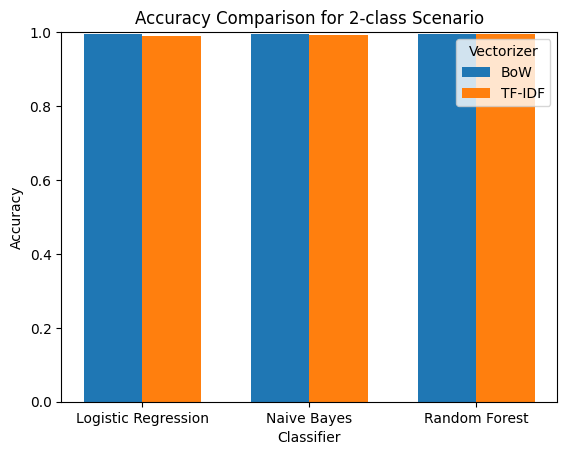

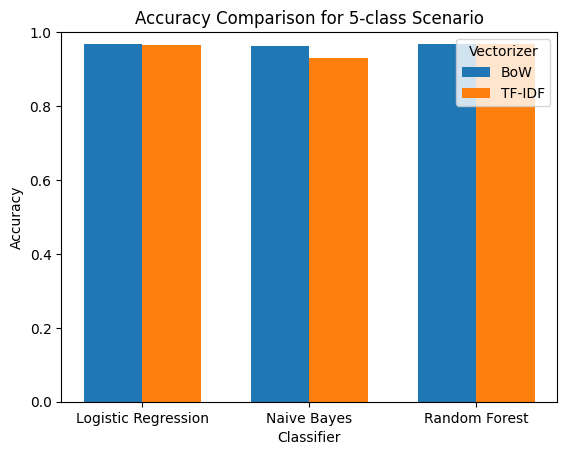

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 1) 'Scenario' : divide 'Vectorizer' and 'ScenarioType'
results_df[['Vectorizer', 'ScenarioType']] = (
    results_df['Scenario']
      .str.split(' \| ', expand=True)
)

# 2)  Bar Chart per scenario
for scenario in ['2-class', '5-class']:
    df_s = results_df[results_df['ScenarioType'] == scenario]
    # 피벗테이블: index=Classifier, columns=Vectorizer, values=Accuracy
    pivot = df_s.pivot(index='Classifier', columns='Vectorizer', values='Accuracy')
    
    classifiers = pivot.index.tolist()
    x = np.arange(len(classifiers))
    width = 0.35

    fig, ax = plt.subplots()
    #  bar chart for BoW, TF-IDF
    ax.bar(x - width/2, pivot['BoW'], width, label='BoW')
    ax.bar(x + width/2, pivot['TF-IDF'], width, label='TF-IDF')
    
    ax.set_xticks(x)
    ax.set_xticklabels(classifiers)
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy Comparison for {scenario} Scenario')
    ax.legend(title='Vectorizer')
    ax.set_ylim(0, 1)

    plt.show()


# OpenAI use 

In [6]:
pip install openai

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import openai

openai.api_key = "YOUR_API_KEY" -> copy and paste to .env file

In [29]:
pip install openai python-dotenv


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# .gitignore
.env

In [28]:
from dotenv import load_dotenv
import os
from openai import OpenAI

# 1) Read .env 
load_dotenv()  #  import .env 

# 2) Call API key from .env
api_key = os.getenv("OPENAI_API_KEY")
if api_key is None:
    raise ValueError("OPENAI_API_KEY error")

# 3) OpenAI Client
client = OpenAI(api_key=api_key)

# 4) API Calling
response = client.chat.completions.create(
    model="gpt-4.1-mini",  # you can change the model name
    messages=[
        {"role": "user", "content": "Write a one-sentence bedtime story about a unicorn."}
    ]
)

# 5) Print the Output
print(response.choices[0].message.content)

As the moonlight danced on the forest floor, Luna the unicorn spread her shimmering wings and flew over the treetops, guiding lost dreams back to sleepy children tucked snugly in their beds.


##### Price per model: https://platform.openai.com/docs/pricing

In [29]:
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {
            "role": "system", 
            "content": """You are a Michelin-starred professional chef with exceptional culinary expertise.
            - Provide simple and practical recipes
            - Clearly specify ingredients and cooking times
            - Explain in a way that even beginners can follow
            - Share professional tips and techniques"""
        },
        {
            "role": "user", 
            "content": "Please tell me how to make bulgogi (Korean marinated beef)"
        }
    ],
    temperature=0.7,  # Creativity control (0.0~2.0)
    max_tokens=1000   # Response length limit (increased from 10 for proper recipe)
)
print(response.choices[0].message.content)

In [36]:
response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        { 
            "role":"system","content":"Sentiment classifier"
        }, 
        {
            "role":"user", "content":"Text: 'MBA is great!' Label?"
        }
    ]
)

print(response.choices[0].message.content)

Positive


LLM Classification Experiment using OpenAI API
Sample size: 20 samples per scenario
LLM Classification Experiment Started (20 samples per scenario)

1. Running 2-class classification...
Sampled data:
Total sample count: 30
Class distribution: {'DevOps Engineer': 18, 'Business Analyst': 12}

OpenAI API classification in progress... (30 samples)
Progress: 1/30
Progress: 2/30
Progress: 3/30
Progress: 4/30
Progress: 5/30
Progress: 6/30
Progress: 7/30
Progress: 8/30
Progress: 9/30
Progress: 10/30
Progress: 11/30
Progress: 12/30
Progress: 13/30
Progress: 14/30
Progress: 15/30
Progress: 16/30
Progress: 17/30
Progress: 18/30
Progress: 19/30
Progress: 20/30
Progress: 21/30
Progress: 22/30
Progress: 23/30
Progress: 24/30
Progress: 25/30
Progress: 26/30
Progress: 27/30
Progress: 28/30
Progress: 29/30
Progress: 30/30

2. Running 5-class classification...
Sampled data:
Total sample count: 30
Class distribution: {'DevOps Engineer': 9, 'Project Manager': 6, 'Business Analyst': 6, 'Java Developer': 5,

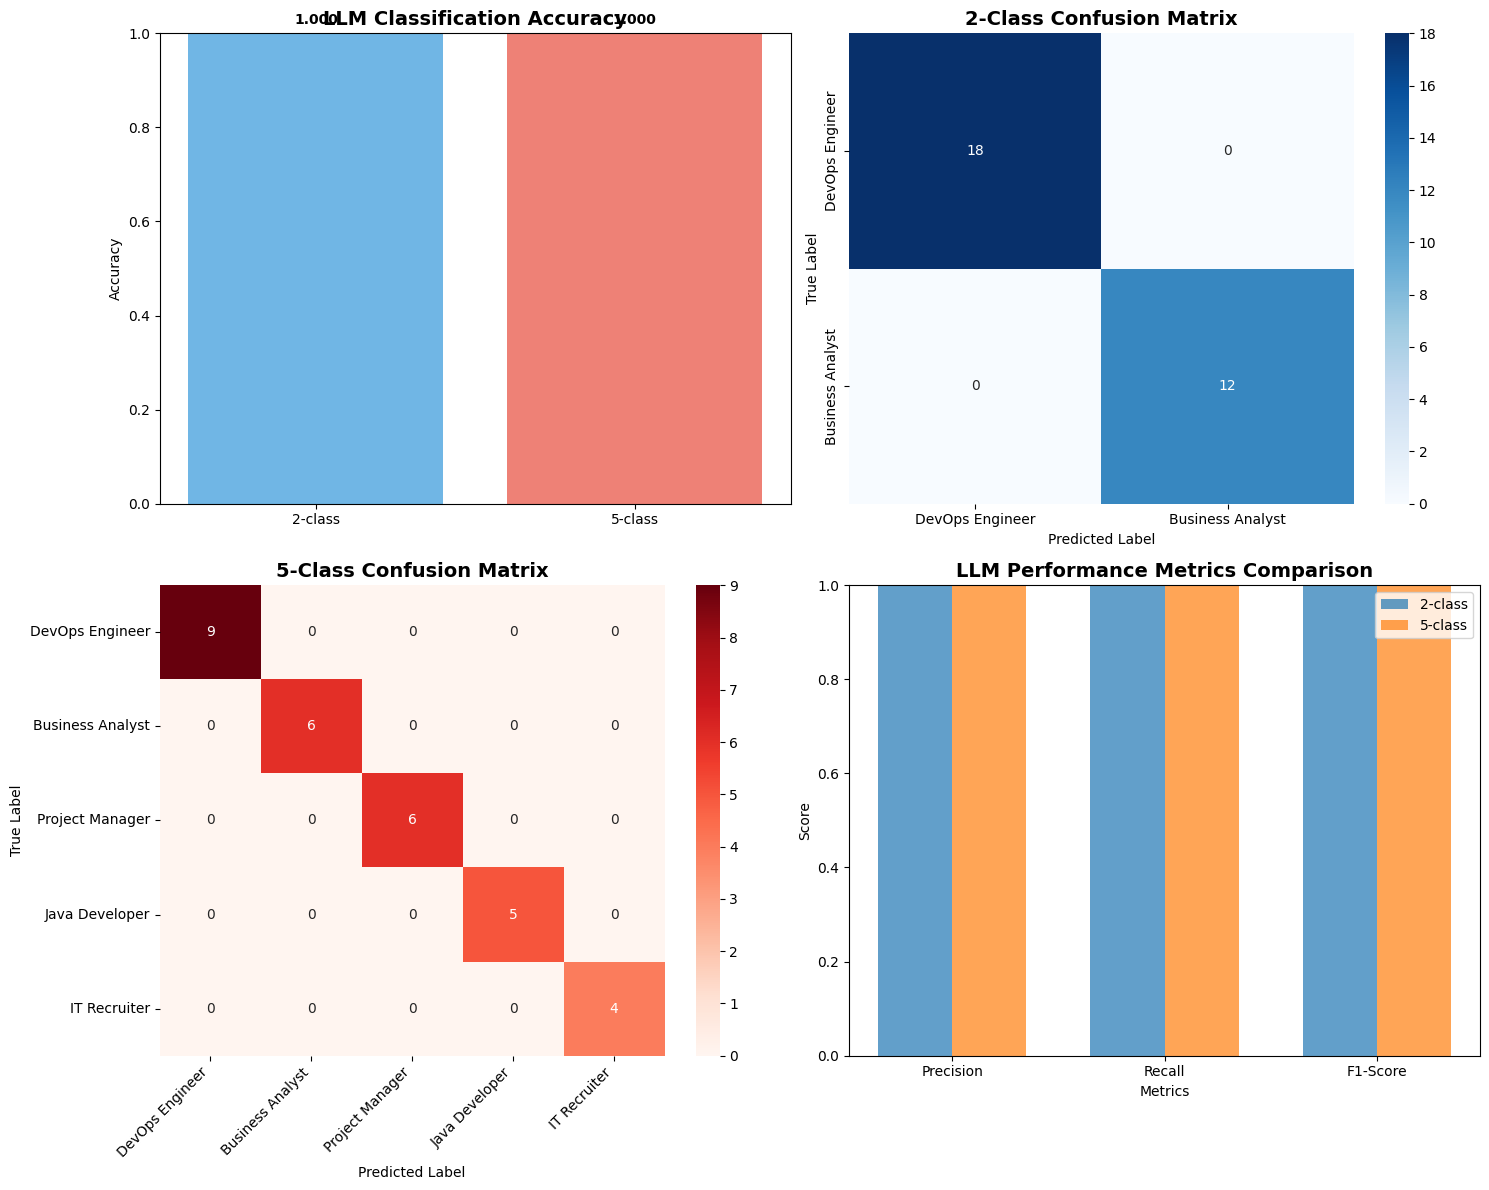


Detailed Analysis Results

2-CLASS Classification Detailed Analysis:
--------------------------------------------------
Total sample count: 30
Accuracy: 1.000
Correct predictions: 30
Incorrect predictions: 0

5-CLASS Classification Detailed Analysis:
--------------------------------------------------
Total sample count: 30
Accuracy: 1.000
Correct predictions: 30
Incorrect predictions: 0

LLM classification results saved to 'llm_classification_results.csv'.

LLM classification experiment completed!


In [37]:
# LLM Classification Code (30 Samples)
import numpy as np
import pandas as pd
import openai
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1) OpenAI API Classification Function
def classify_with_openai(text, classes, model="gpt-4.1-mini"):
    """Text classification using OpenAI API"""
    classes_str = ", ".join(classes)
    
    prompt = f"""
    Please analyze the following text and classify it into the most appropriate job category.
    
    Available categories: {classes_str}
    
    Text: {text[:1500]}  # Limit text length for token constraints
    
    Please respond with exactly one of the above categories only. No other explanation needed, just the category name.
    """
    
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "You are a job classification expert. Please analyze the given text accurately and classify it into the appropriate job category. Only respond with the category name."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=50,
            temperature=0
        )
        
        prediction = response.choices[0].message.content.strip()
        
        # Check if prediction result is a valid class
        for cls in classes:
            if cls.lower() in prediction.lower():
                return cls
        
        # Return first class if no exact match found (default)
        print(f"Matching failed: {prediction}")
        return classes[0]
        
    except Exception as e:
        print(f"API error: {e}")
        return classes[0]  # Return default value on error

def evaluate_openai_classifier(X, y, classes, sample_size=20, model="gpt-4.1-mini"):
    """Evaluate OpenAI API classifier (30 samples)"""
    
    # Select samples evenly from each class using stratified sampling
    X_sample, _, y_sample, _ = train_test_split(
        X, y, test_size=1-sample_size/len(X), random_state=42, stratify=y
    )
    
    print(f"Sampled data:")
    print(f"Total sample count: {len(X_sample)}")
    print(f"Class distribution: {y_sample.value_counts().to_dict()}")
    
    predictions = []
    
    print(f"\nOpenAI API classification in progress... ({len(X_sample)} samples)")
    for i, text in enumerate(X_sample):
        print(f"Progress: {i+1}/{len(X_sample)}")
        pred = classify_with_openai(text, classes, model)
        predictions.append(pred)
        time.sleep(1)  # Prevent API rate limiting (1 second wait)
    
    # Calculate performance
    acc = accuracy_score(y_sample, predictions)
    report = classification_report(y_sample, predictions, output_dict=True, zero_division=0)
    
    return {
        'predictions': predictions,
        'true_labels': list(y_sample),
        'accuracy': acc,
        'report': report,
        'sample_texts': list(X_sample),
        'confusion_matrix': confusion_matrix(y_sample, predictions, labels=classes)
    }

# 3) Run LLM Classification and Analyze Results
def run_llm_classification():
    """Run LLM classification"""
    results = {}
    
    print("=" * 60)
    print("LLM Classification Experiment Started (30 samples per scenario)")
    print("=" * 60)
    
    # 2-class classification
    print("\n1. Running 2-class classification...")
    results['2-class'] = evaluate_openai_classifier(X2, y2, classes_2, sample_size=30)
    
    # 5-class classification
    print("\n2. Running 5-class classification...")
    results['5-class'] = evaluate_openai_classifier(X5, y5, classes_5, sample_size=30)
    
    return results

# 4) LLM Results Analysis and Visualization
def analyze_llm_results(results):
    """Analyze LLM results"""
    
    print("\n" + "=" * 60)
    print("LLM Classification Results Analysis")
    print("=" * 60)
    
    summary_data = []
    
    for scenario, result in results.items():
        print(f"\n{scenario} classification results:")
        print(f"Accuracy: {result['accuracy']:.3f}")
        
        # Performance by class
        print("\nPerformance by class:")
        for class_name in result['report'].keys():
            if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
                metrics = result['report'][class_name]
                print(f"  {class_name}:")
                print(f"    Precision: {metrics['precision']:.3f}")
                print(f"    Recall: {metrics['recall']:.3f}")
                print(f"    F1-Score: {metrics['f1-score']:.3f}")
        
        # Save summary data
        summary_data.append({
            'Scenario': f'OpenAI | {scenario}',
            'Method': 'gpt-4.1-mini',
            'Accuracy': round(result['accuracy'], 3),
            'Precision': round(result['report']['weighted avg']['precision'], 3),
            'Recall': round(result['report']['weighted avg']['recall'], 3),
            'F1-Score': round(result['report']['weighted avg']['f1-score'], 3),
            'Type': 'LLM'
        })
    
    return pd.DataFrame(summary_data)

# 5) LLM Results Visualization
def visualize_llm_results(results):
    """Visualize LLM results"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Accuracy comparison
    scenarios = list(results.keys())
    accuracies = [results[s]['accuracy'] for s in scenarios]
    
    axes[0, 0].bar(scenarios, accuracies, color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[0, 0].set_title('LLM Classification Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_ylim(0, 1)
    for i, acc in enumerate(accuracies):
        axes[0, 0].text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontweight='bold')
    
    # 2. Confusion matrix (2-class)
    cm_2 = results['2-class']['confusion_matrix']
    sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes_2, yticklabels=classes_2, ax=axes[0, 1])
    axes[0, 1].set_title('2-Class Confusion Matrix', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('True Label')
    axes[0, 1].set_xlabel('Predicted Label')
    
    # 3. Confusion matrix (5-class)
    cm_5 = results['5-class']['confusion_matrix']
    sns.heatmap(cm_5, annot=True, fmt='d', cmap='Reds', 
                xticklabels=classes_5, yticklabels=classes_5, ax=axes[1, 0])
    axes[1, 0].set_title('5-Class Confusion Matrix', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('True Label')
    axes[1, 0].set_xlabel('Predicted Label')
    plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
    plt.setp(axes[1, 0].get_yticklabels(), rotation=0)
    
    # 4. Metrics comparison
    metrics = ['Precision', 'Recall', 'F1-Score']
    metrics_2 = [results['2-class']['report']['weighted avg'][m.lower().replace('-', '-')] for m in ['precision', 'recall', 'f1-score']]
    metrics_5 = [results['5-class']['report']['weighted avg'][m.lower().replace('-', '-')] for m in ['precision', 'recall', 'f1-score']]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    axes[1, 1].bar(x - width/2, metrics_2, width, label='2-class', alpha=0.7)
    axes[1, 1].bar(x + width/2, metrics_5, width, label='5-class', alpha=0.7)
    
    axes[1, 1].set_xlabel('Metrics')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].set_title('LLM Performance Metrics Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(metrics)
    axes[1, 1].legend()
    axes[1, 1].set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# 6) Detailed Analysis Output
def detailed_analysis(results):
    """Output detailed analysis results"""
    
    print("\n" + "=" * 80)
    print("Detailed Analysis Results")
    print("=" * 80)
    
    for scenario, result in results.items():
        print(f"\n{scenario.upper()} Classification Detailed Analysis:")
        print("-" * 50)
        
        print(f"Total sample count: {len(result['true_labels'])}")
        print(f"Accuracy: {result['accuracy']:.3f}")
        
        # Analysis of correct/incorrect predictions by class
        true_labels = result['true_labels']
        predictions = result['predictions']
        
        correct_predictions = sum(1 for true, pred in zip(true_labels, predictions) if true == pred)
        incorrect_predictions = len(true_labels) - correct_predictions
        
        print(f"Correct predictions: {correct_predictions}")
        print(f"Incorrect predictions: {incorrect_predictions}")
        
        if incorrect_predictions > 0:
            print(f"\nMisclassified cases:")
            for i, (true, pred) in enumerate(zip(true_labels, predictions)):
                if true != pred:
                    print(f"  Sample {i+1}: {true} → {pred}")

# 7) Main Execution
if __name__ == "__main__":
    print("LLM Classification Experiment using OpenAI API")
    print("Sample size: 30 samples per scenario")
    
    # Run LLM classification
    llm_results = run_llm_classification()
    
    # Analyze results
    llm_summary = analyze_llm_results(llm_results)
    
    # Visualization
    visualize_llm_results(llm_results)
    
    # Detailed analysis
    detailed_analysis(llm_results)
    
    # Save results
    llm_summary.to_csv('llm_classification_results.csv', index=False)
    print(f"\nLLM classification results saved to 'llm_classification_results.csv'.")
    
    print("\nLLM classification experiment completed!")

In [1]:
%pip install --upgrade ollama


Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: ollama
    Found existing installation: ollama 0.3.3
    Uninstalling ollama-0.3.3:
      Successfully uninstalled ollama-0.3.3
Note: you may need to restart the kernel to use updated packages.


# Local LLM

In [4]:
import ollama
response = ollama.chat(model='llama3', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])
print(response['message']['content'])

A classic question!

The sky appears blue because of a phenomenon called scattering, which occurs when sunlight interacts with tiny molecules of gases in the Earth's atmosphere. Here's what happens:

1. **Sunlight enters the Earth's atmosphere**: When sunlight enters our atmosphere, it contains all the colors of the visible spectrum (red, orange, yellow, green, blue, indigo, and violet).
2. **Molecules scatter shorter wavelengths**: As the sunlight travels through the atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2). These molecules are much smaller than the wavelength of light.
3. **Blue light is scattered more than other colors**: The smaller molecules scatter the shorter wavelengths of light, like blue and violet, more effectively than longer wavelengths, like red and orange. This is because the smaller molecules can deflect the shorter wavelengths more easily due to their smaller size relative to the wavelength.
4. **Red light continues to tra